### <strong>期末專題：雙變量函數的繪圖 & 多變量函數的參數估計與極值計算</strong>
學號：411073088

姓名：陳敬翰
<hr>

<font color=yellow>作品目標</font>：
本作品分為兩部分  
1. 混合常態參數估計 Normal Mixture  
2. 限制式條件的最大值問題 Constraint optimization  
透過這兩部分來學習....

<hr>

## 混合常態參數估計 Normal Mixture

### 單個圖形的繪製

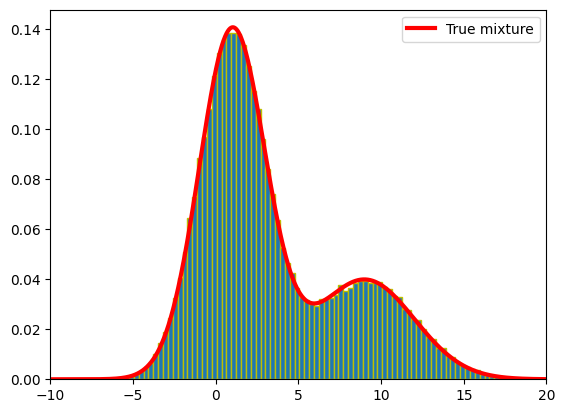

In [90]:
from scipy.stats import beta, norm  
import matplotlib.pyplot as plt
import numpy as np

# 樣本大小
n = 100000

# 兩個常態分配的參數
mu1,mu2 = 1,9
sigma1,sigma2 = 2,3

# 兩個常態分配的混合比例
p1 = 0.7

x = np.linspace(-50,50,n) 

# 混合常態分配的機率密度函數
y = p1 * norm.pdf(x,mu1,sigma1) + (1-p1) * norm.pdf(x,mu2,sigma2)
plt.plot(x,y, color='r', linewidth=3, label='True mixture')


n1 = int(n * p1)
n2 = n - n1
sample = np.r_[norm.rvs(mu1,sigma1,size=n1), norm.rvs(mu2,sigma2,size=n2)]

plt.hist(sample, bins=100, edgecolor='y', density=True)
plt.legend()
plt.xlim(-10,20)
plt.show()

### 繪製多個圖形以供觀察

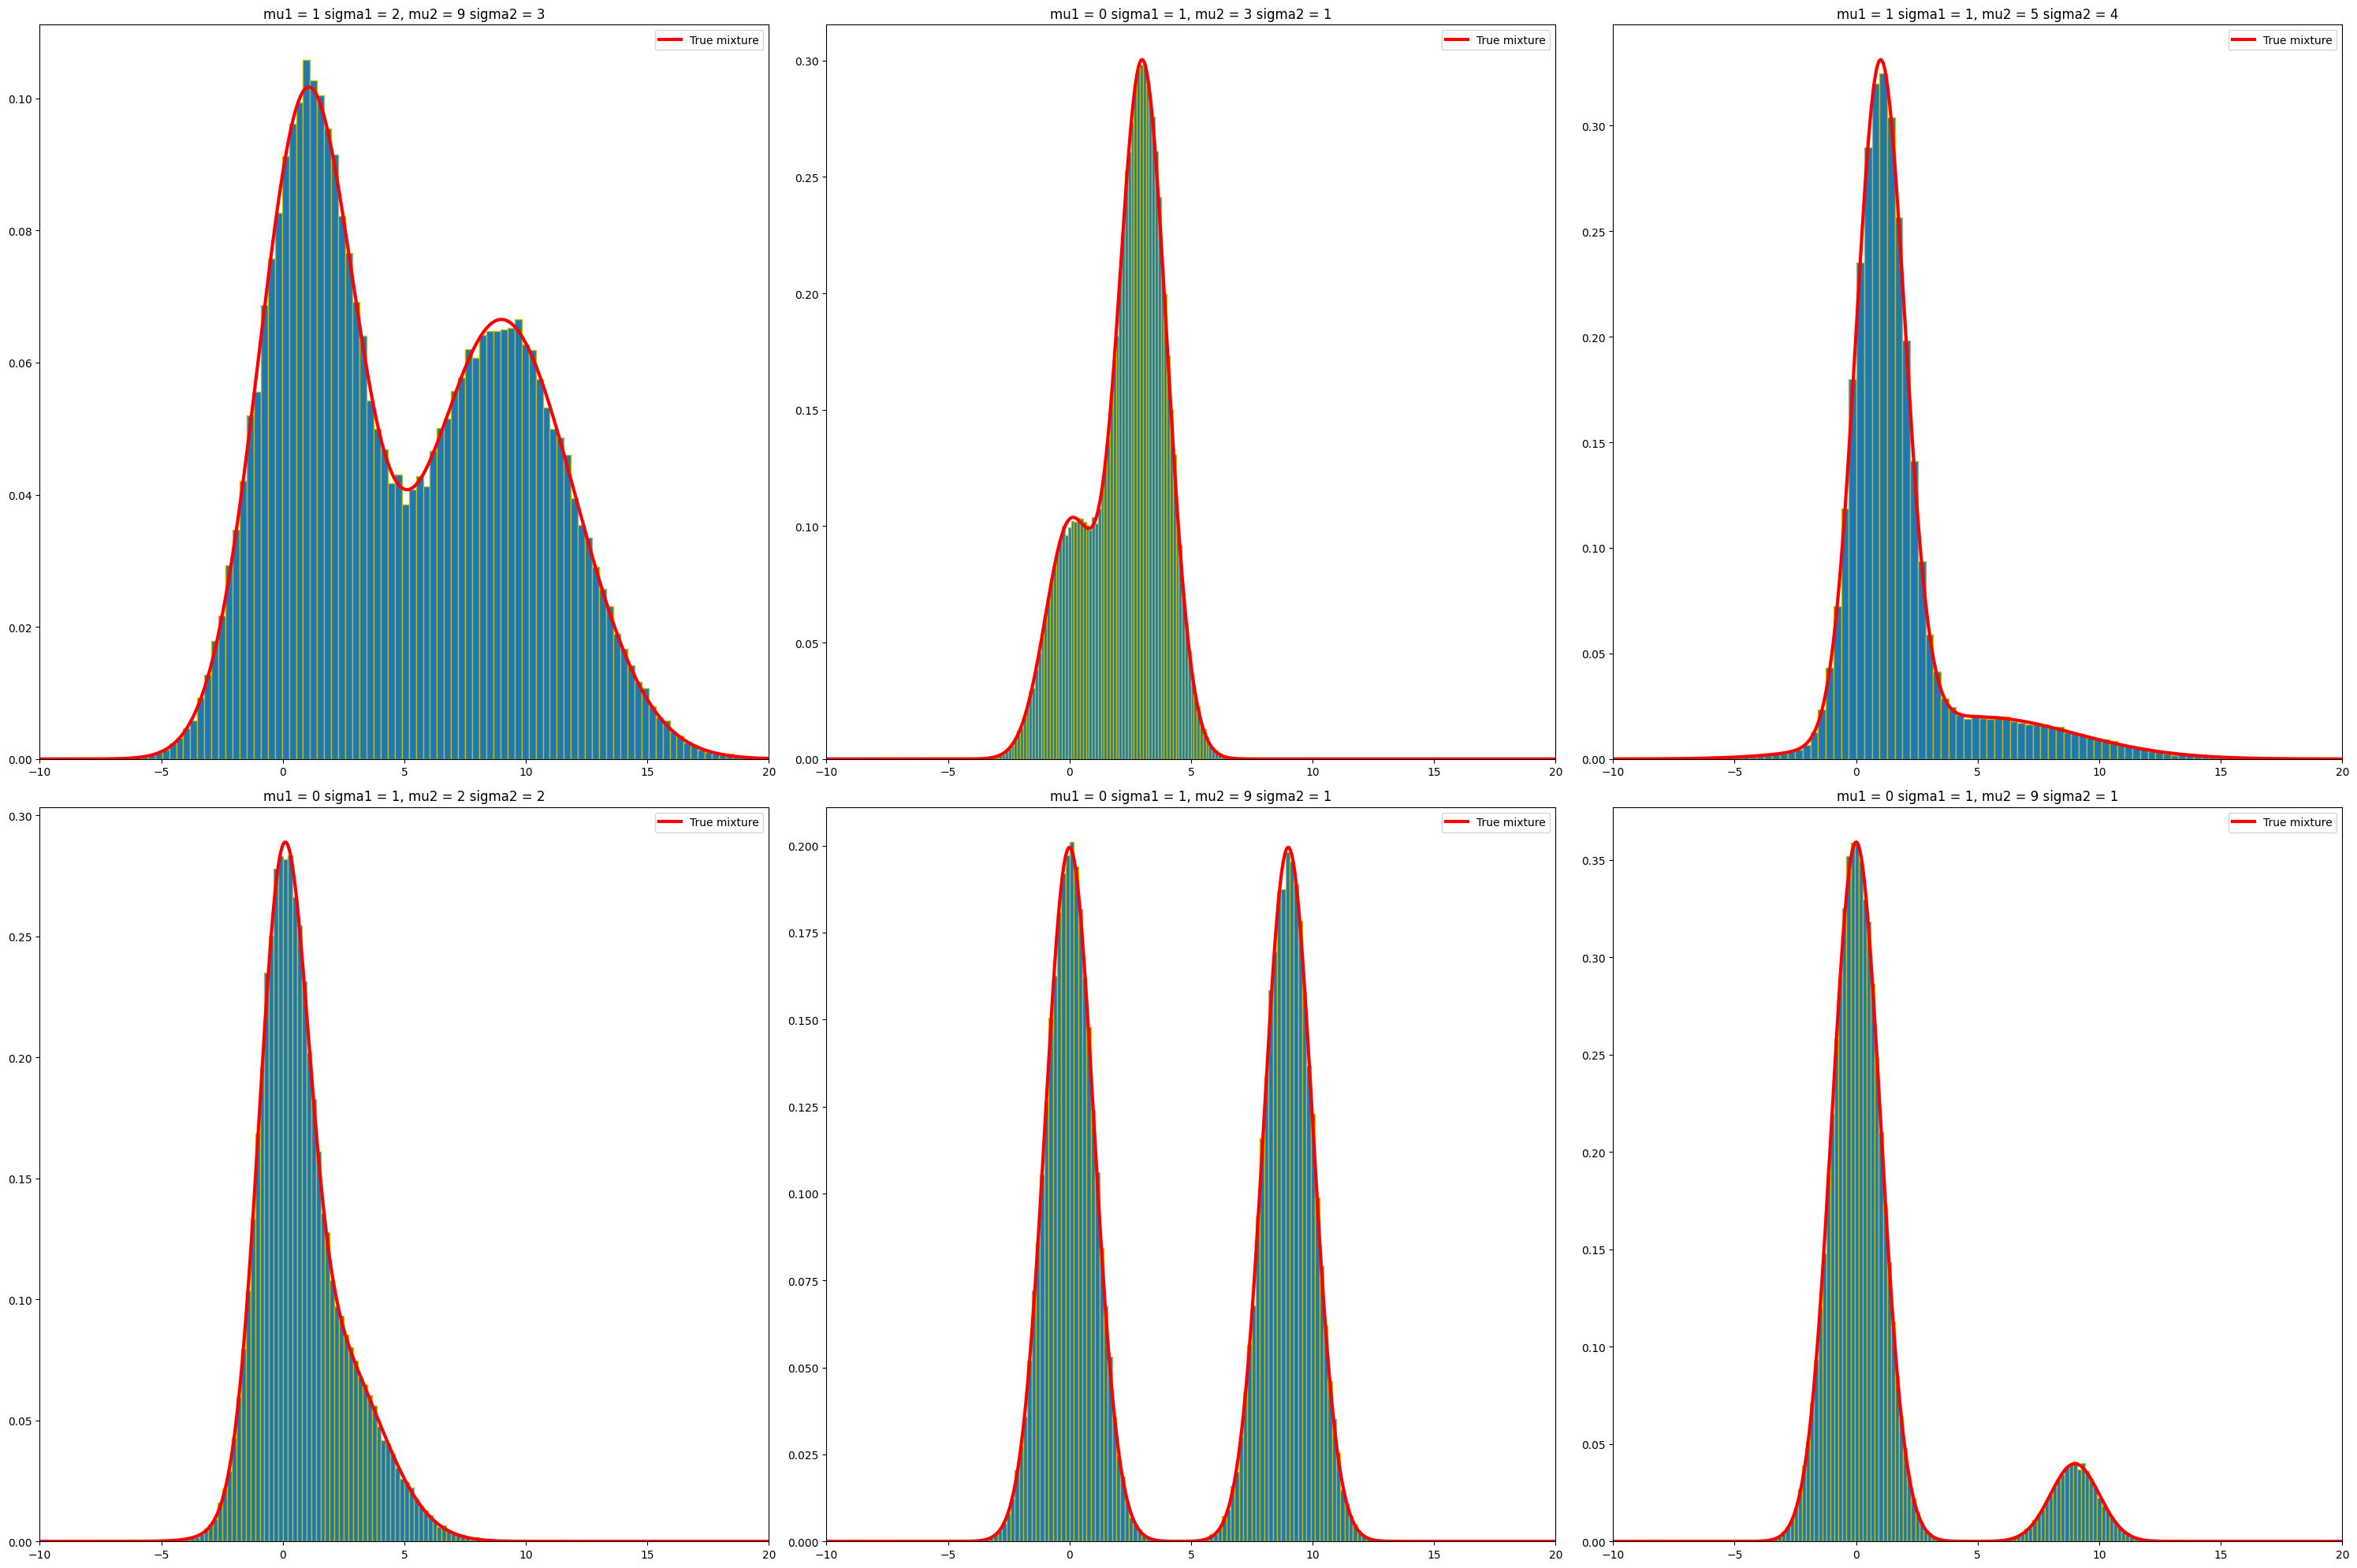

In [88]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

# 樣本大小
n = 100000


# 兩個常態分佈的參數
mu1 = [1, 0, 1, 0, 0, 0]
sigma1 = [2, 1, 1, 1, 1, 1]
mu2 = [9, 3, 5, 2, 9, 9]
sigma2 = [3, 1, 4, 2, 1, 1]

# 混合常態分佈的比例
p1 = [0.5, 0.25, 0.8, 0.6, 0.5, 0.9]

x = np.linspace(-50, 50, n)

fig, ax = plt.subplots(2, 3, figsize=(30, 20))


def find_mix_pdf(x, mu1, sigma1, mu2, sigma2, p1):
    return p1 * norm.pdf(x, mu1, sigma1) + (1 - p1) * norm.pdf(x, mu2, sigma2)

for i in range(len(mu1)):

    # 計算混合常態分佈的機率密度函數
    y = find_mix_pdf(x, mu1[i], sigma1[i], mu2[i], sigma2[i], p1[i])

    # 計算混合常態分佈的樣本數量
    n1 = int(n * p1[i])
    n2 = n - n1

    # 產生混合常態分佈的樣本
    sample = np.concatenate([norm.rvs(mu1[i], sigma1[i], size=n1), norm.rvs(mu2[i], sigma2[i], size=n2)])


    ax[i // 3, i % 3].plot(x, y, color='r', linewidth=3, label='True mixture')
    ax[i // 3, i % 3].hist(sample, bins=100, edgecolor='y', density=True)
    ax[i // 3, i % 3].set_title("mu1 = {} sigma1 = {}, mu2 = {} sigma2 = {}".format(mu1[i], sigma1[i], mu2[i], sigma2[i]))
    ax[i // 3, i % 3].legend()

    # 把範圍限制在 -10 ~ 20方便觀察
    ax[i // 3, i % 3].set_xlim(-10, 20)


plt.tight_layout()
plt.show()


這六張圖由左至右、右上到下分別為：
1. 平均數1、標準差2的常態與平均數9、標準差3的常態依據權重0.5混合而成
2. 平均數0、標準差1的常態與平均數3、標準差1的常態依據權重0.25混合而成
3. 平均數1、標準差1的常態與平均數5、標準差4的常態依據權重0.8混合而成
4. 平均數0、標準差1的常態與平均數2、標準差2的常態依據權重0.6混合而成
5. 平均數0、標準差1的常態與平均數9、標準差1的常態依據權重0.5混合而成
6. 平均數0、標準差1的常態與平均數9、標準差1的常態依據權重0.9混合而成

由這幾張圖可以看出以下幾點  
1. 當兩個常態的平均越接近，混合的圖形的高峰會越平坦
2. 標準差越大，越容易有長尾的情況
3. 權重越大，出來的圖形會越往該常態的方向偏移

### 查看樣本數對於混合常態的影響
1. 根據mle函數，我們可以得到混合常態的參數估計值
2. 查看樣本數對於參數估計值的影響

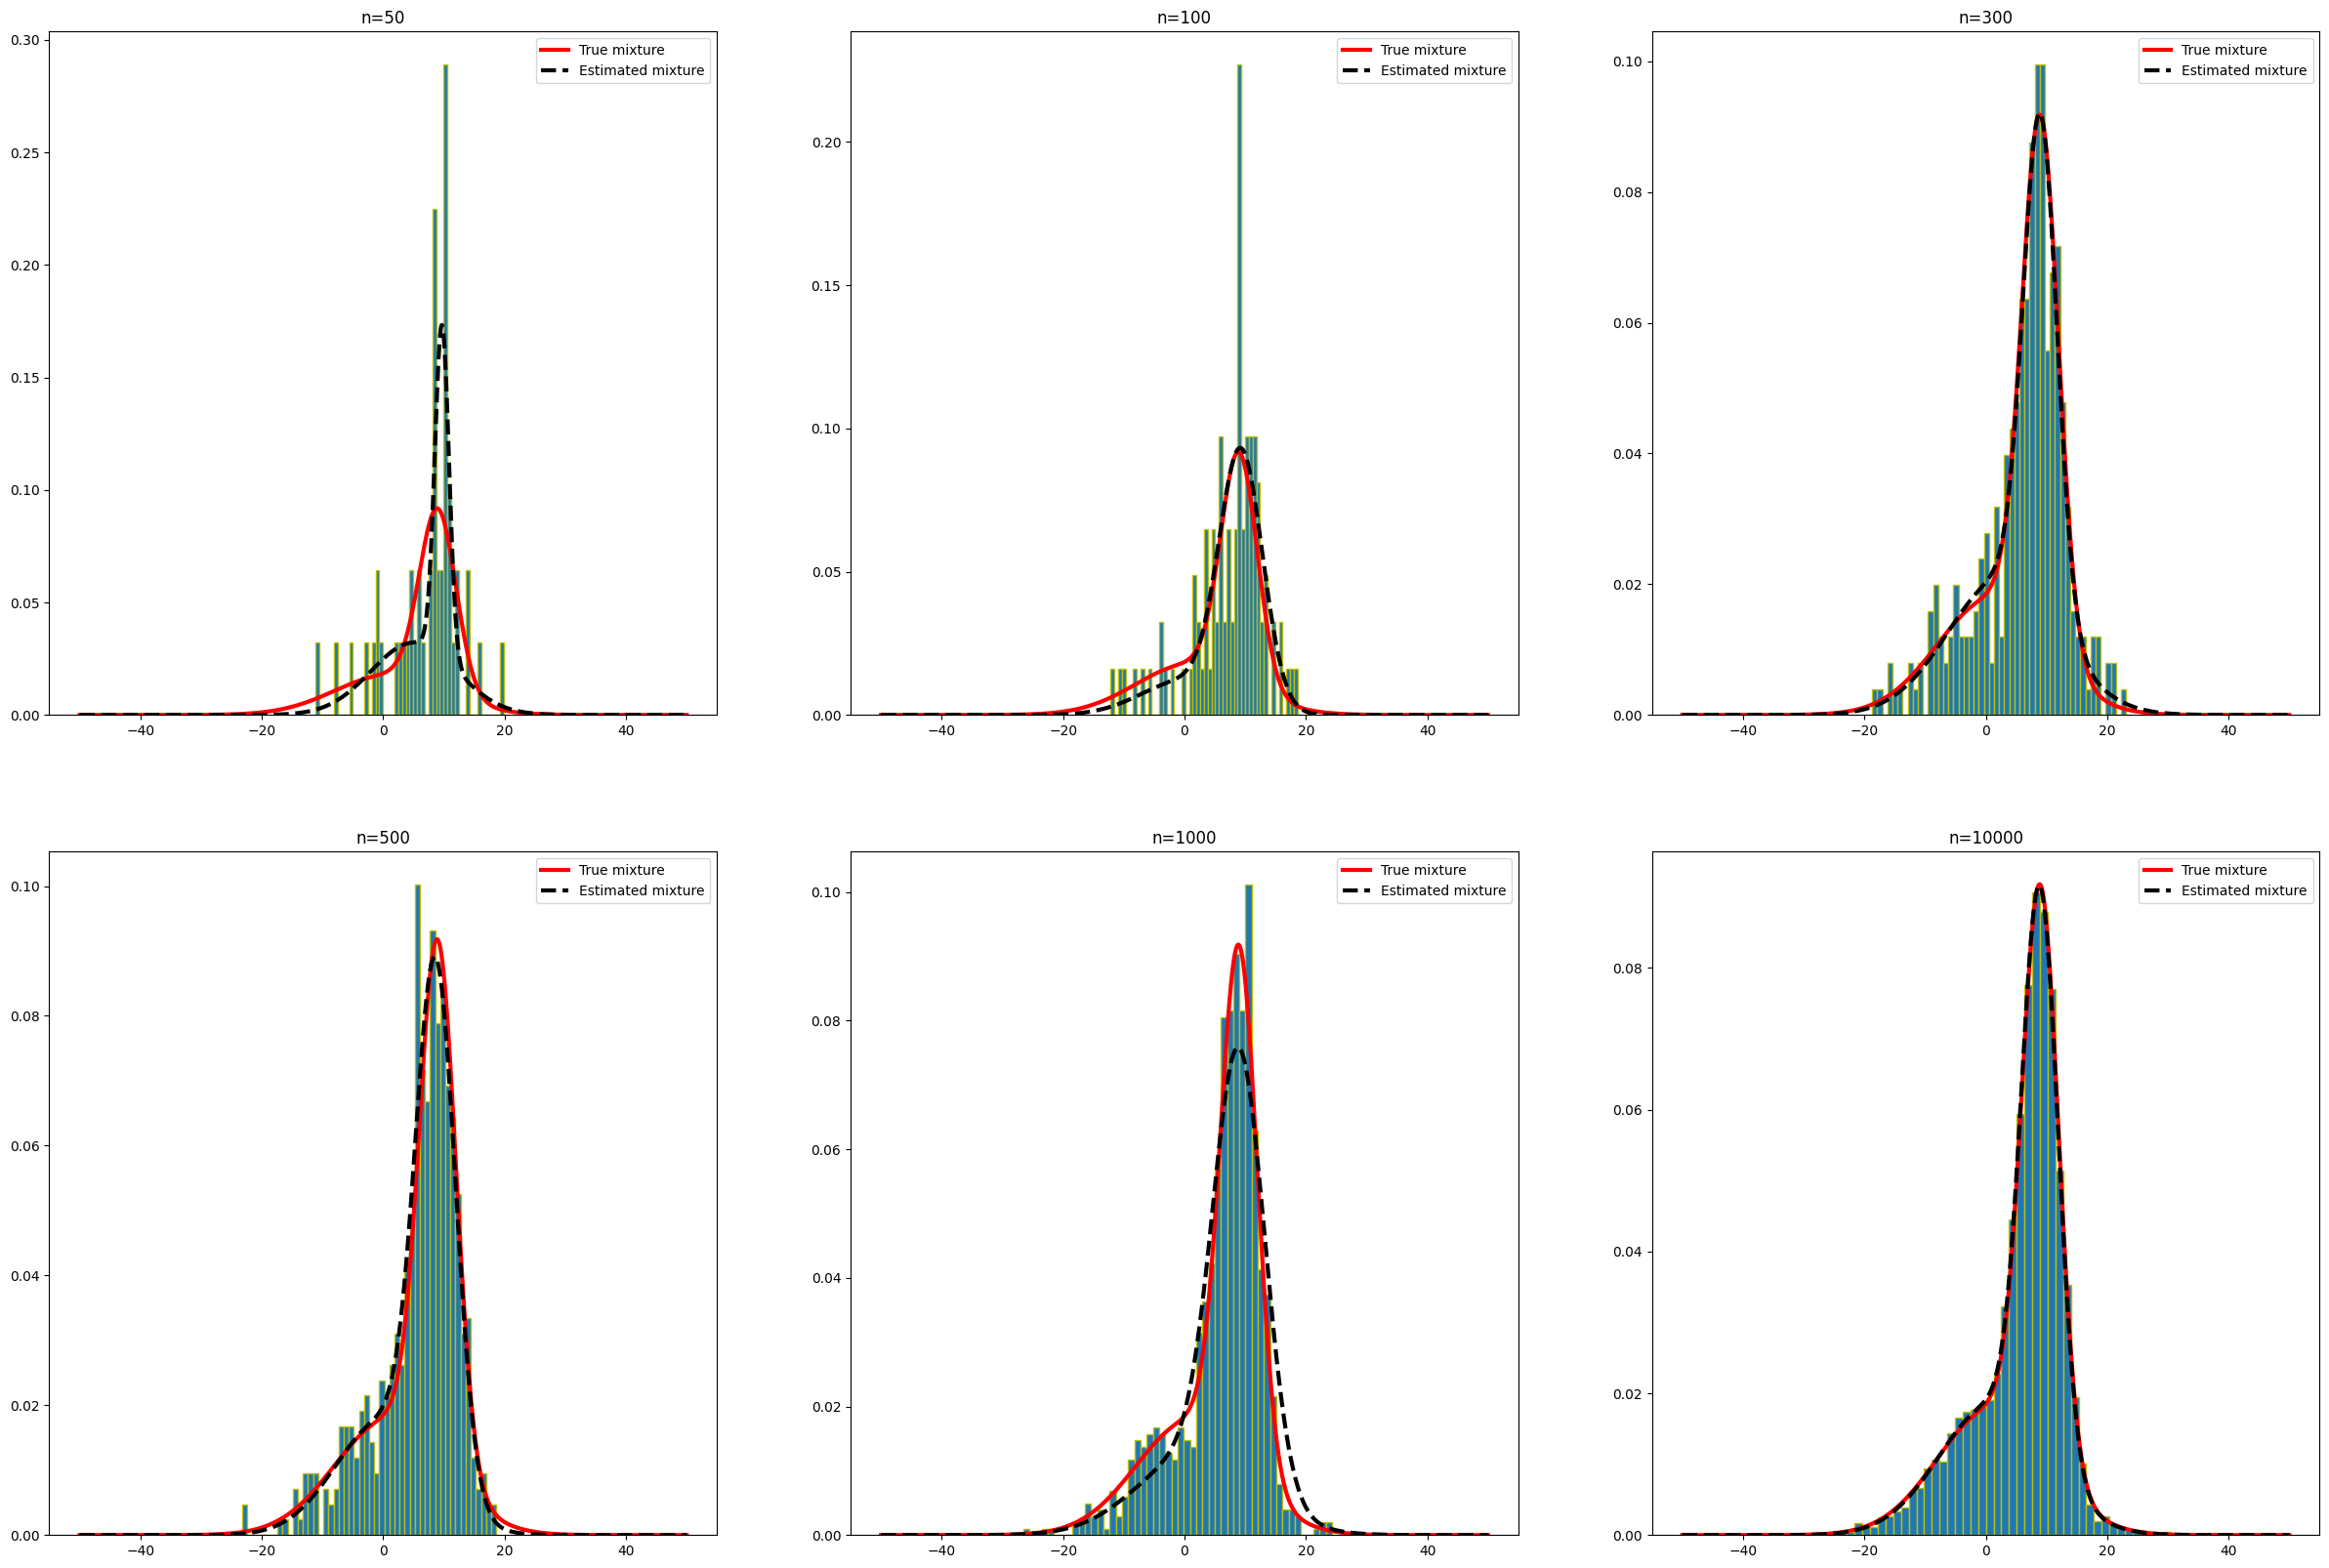

In [96]:
import numpy as np
from scipy.stats import norm, binom
import matplotlib.pyplot as plt
import scipy.optimize as opt


def plot_mixture(pi1, mu1_list, sigma1_list, mu2_list, sigma2_list, n):
    num_plots = len(mu1_list)

    fig, ax = plt.subplots(2, 3, figsize=(30, 20))

    for i in range(num_plots):
        mu1 = mu1_list[i]
        sigma1 = sigma1_list[i]
        mu2 = mu2_list[i]
        sigma2 = sigma2_list[i]

        # 計算混合常態分佈的機率密度函數
        f = lambda x: pi1 * norm.pdf(x, mu1, sigma1) + (1 - pi1) * norm.pdf(x, mu2, sigma2)
        x = np.linspace(-50, 50, 10000)

        ax[i // 3, i % 3].plot(x, f(x), color='r', linewidth=3, label='True mixture')


        n1 = binom.rvs(n[i], pi1)
        n2 = n[i] - n1
        sample = np.concatenate([norm.rvs(mu1, sigma1, size=n1), norm.rvs(mu2, sigma2, size=n2)])

        ax[i // 3, i % 3].hist(sample, 50, edgecolor='y', density=True)

        # 透過最大概似法估計混合常態分佈的參數
        L = lambda x: -np.sum(np.log(x[0] * norm.pdf(sample, x[1], x[2]) + (1 - x[0]) * norm.pdf(sample, x[3], x[4])))

        bnds = [(0, 1), (0, np.inf), (0, np.inf), (0, np.inf), (0, np.inf)]
        opts = dict(disp = True, maxiter = 1e4)
        x0 = [0.5, 1, 10, 5, 5] 

        res = opt.minimize(L, x0=x0, bounds=bnds, options=opts, tol=1e-8)

        f_hat = lambda x: res.x[0] * norm.pdf(x, res.x[1], res.x[2]) + (1 - res.x[0]) * norm.pdf(x, res.x[3], res.x[4])
        ax[i // 3, i % 3].plot(x, f_hat(x), color='k', linestyle='--', linewidth=3, label='Estimated mixture')
        ax[i // 3, i % 3].set_title('n={}'.format(n[i]))
        ax[i // 3, i % 3].legend()

    plt.show()

pi1 = 0.4
mu1_list = [1,1,1,1,1,1]
sigma1_list = [9,9,9,9,9,9]
mu2_list = [9,9,9,9,9,9]
sigma2_list = [3,3,3,3,3,3,3]
n = [50,100,300,500,1000,10000]
plot_mixture(pi1, mu1_list, sigma1_list, mu2_list, sigma2_list, n)


上面的圖是以平均為1標準差為9的常態混合平均為9標準差為3的混合常態在樣本數為50,100,300,500,1000,10000時的實際值與估計值，由此張圖可以看出
1. 樣本數越大，估計值越接近實際值

### 使用GaussianMixture估計混合常態的參數
1. 使用GaussianMixture函數估計混合常態的參數，並與mle函數的結果做比較

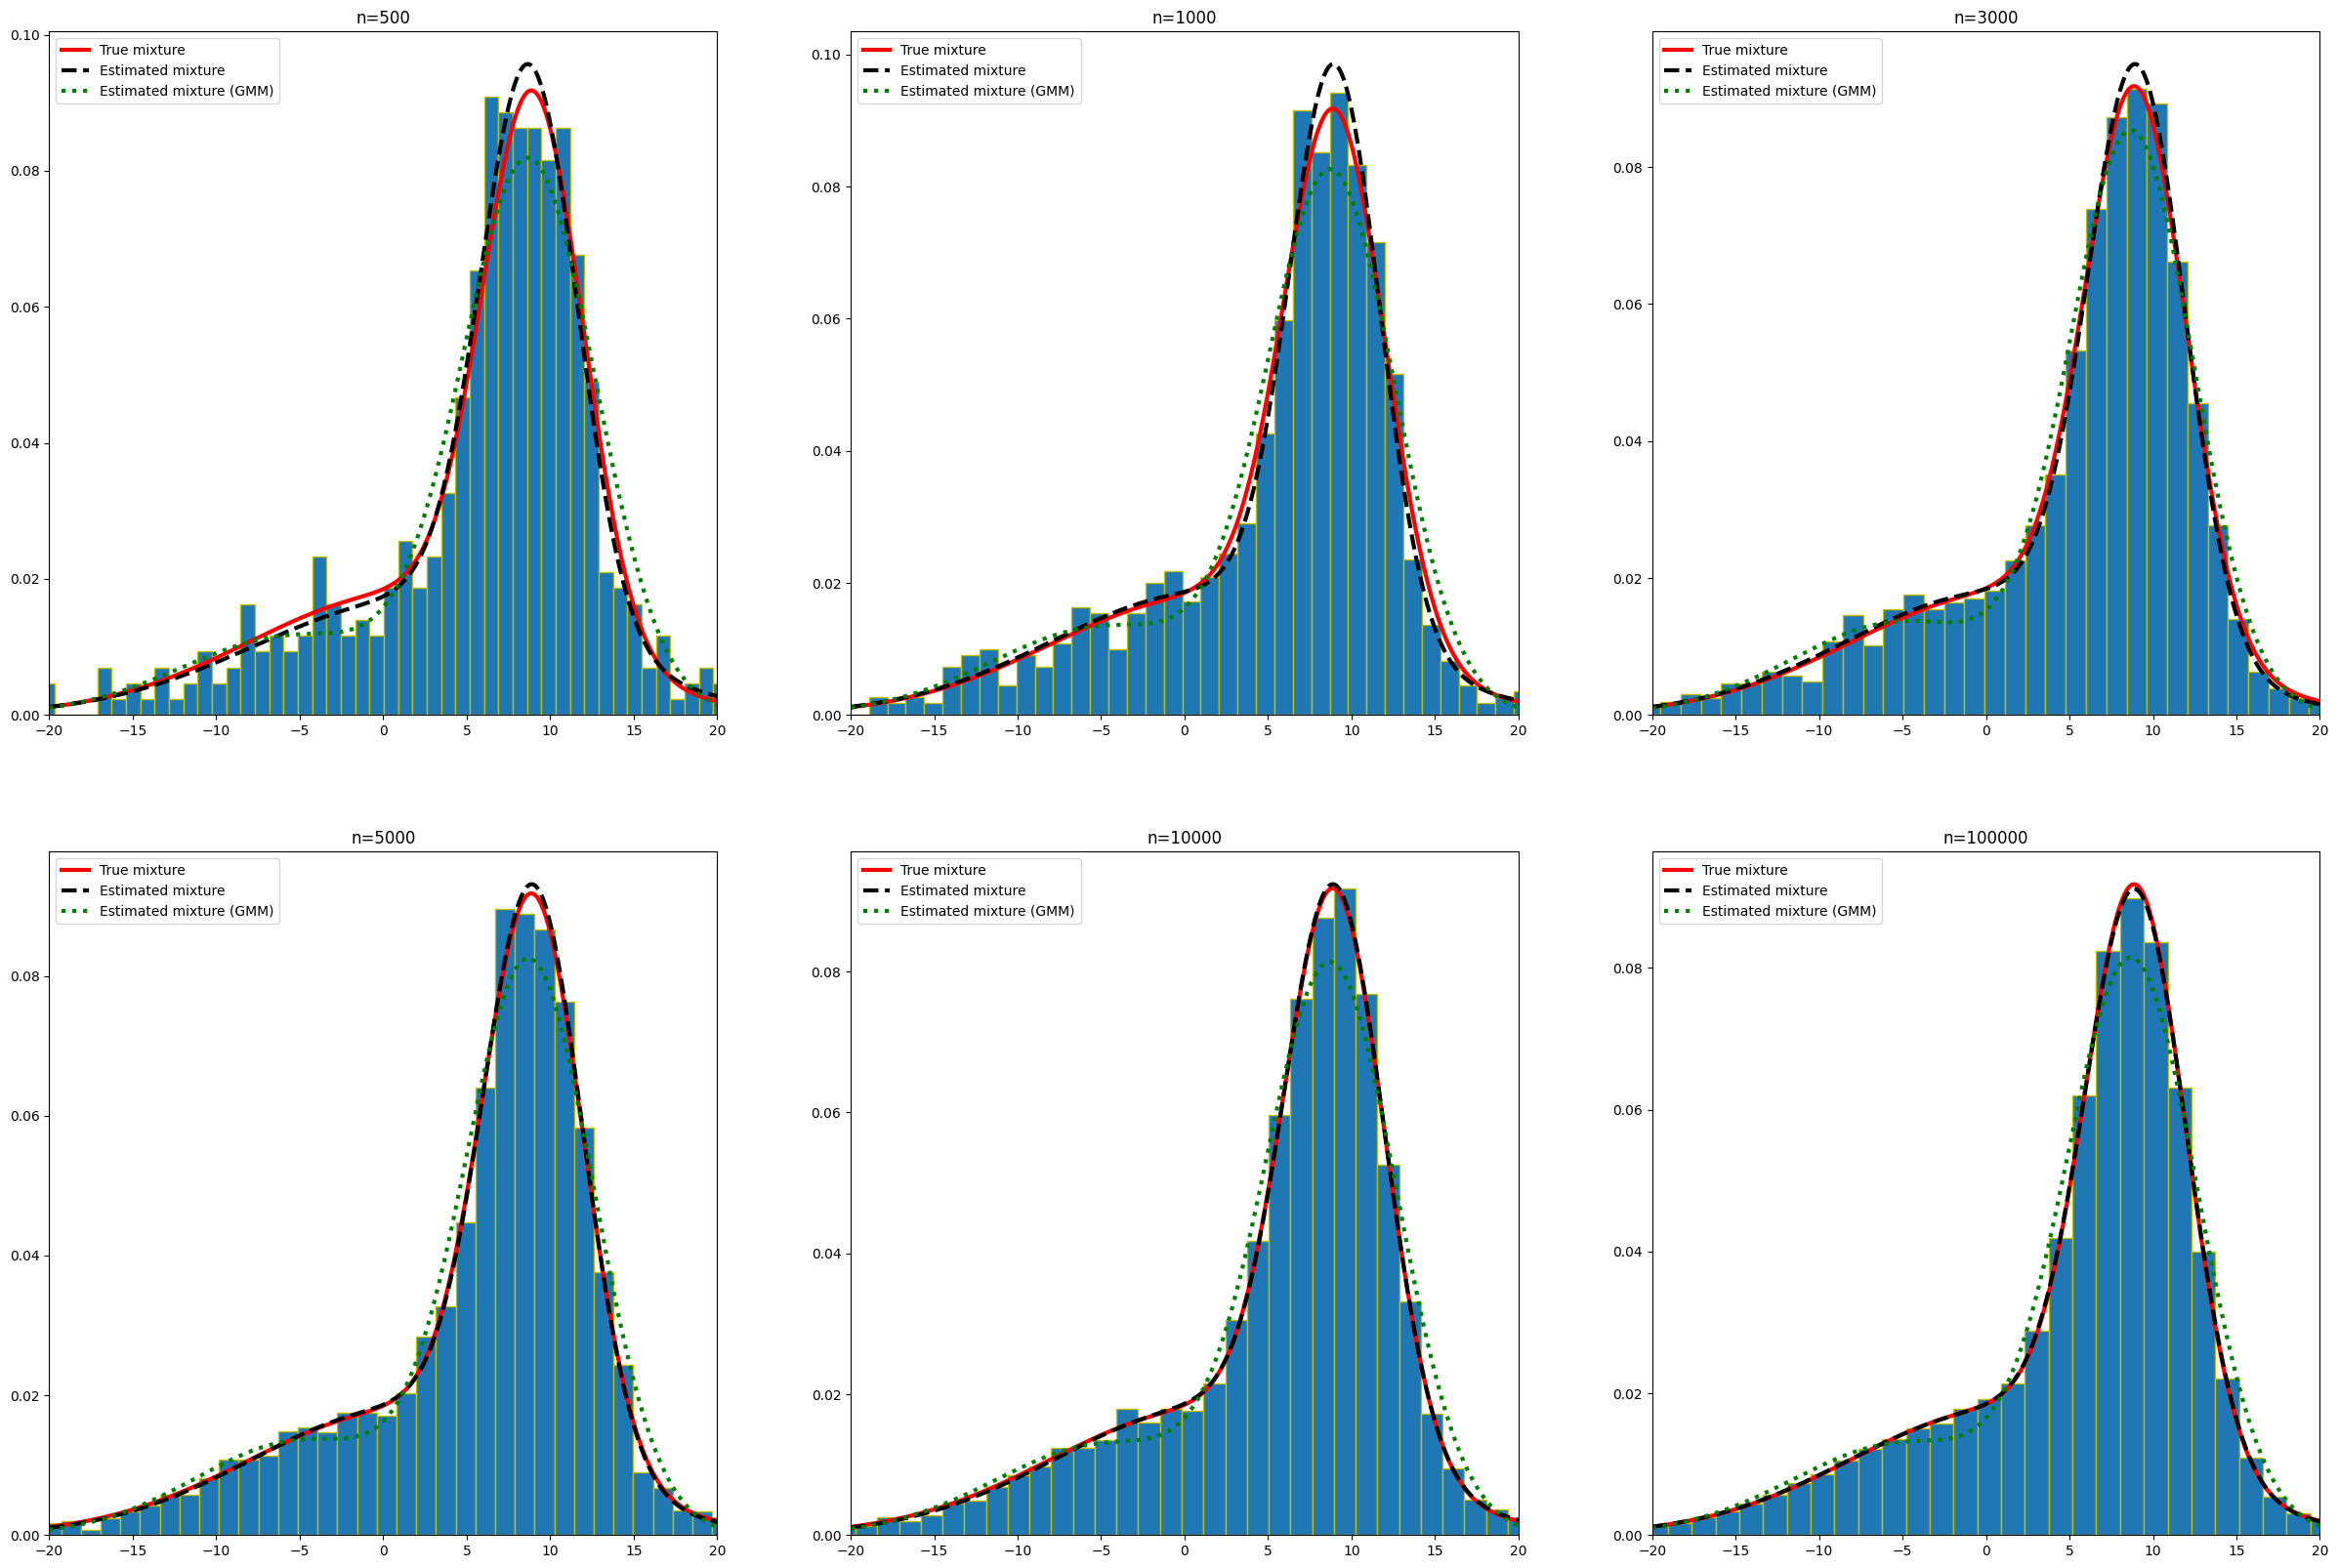

In [103]:
import numpy as np
from scipy.stats import norm, binom
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn.mixture import GaussianMixture


def plot_mixture(pi1, mu1_list, sigma1_list, mu2_list, sigma2_list, n):
    num_plots = len(mu1_list)

    fig, ax = plt.subplots(2, 3, figsize=(30, 20))

    for i in range(num_plots):
        mu1 = mu1_list[i]
        sigma1 = sigma1_list[i]
        mu2 = mu2_list[i]
        sigma2 = sigma2_list[i]

        # 計算混合常態分佈的機率密度函數
        f = lambda x: pi1 * norm.pdf(x, mu1, sigma1) + (1 - pi1) * norm.pdf(x, mu2, sigma2)
        x = np.linspace(-50, 50, 10000)

        ax[i // 3, i % 3].plot(x, f(x), color='r', linewidth=3, label='True mixture')


        n1 = binom.rvs(n[i], pi1)
        n2 = n[i] - n1
        sample = np.concatenate([norm.rvs(mu1, sigma1, size=n1), norm.rvs(mu2, sigma2, size=n2)])

        ax[i // 3, i % 3].hist(sample, 50, edgecolor='y', density=True)

        # 透過最大概似法估計混合常態分佈的參數
        L = lambda x: -np.sum(np.log(x[0] * norm.pdf(sample, x[1], x[2]) + (1 - x[0]) * norm.pdf(sample, x[3], x[4])))

        bnds = [(0, 1), (0, np.inf), (0, np.inf), (0, np.inf), (0, np.inf)]
        opts = dict(disp = True, maxiter = 1e4)
        x0 = [0.5, 1, 10, 5, 5] 

        res = opt.minimize(L, x0=x0, bounds=bnds, options=opts, tol=1e-8)

        f_hat = lambda x: res.x[0] * norm.pdf(x, res.x[1], res.x[2]) + (1 - res.x[0]) * norm.pdf(x, res.x[3], res.x[4])
        ax[i // 3, i % 3].plot(x, f_hat(x), color='k', linestyle='--', linewidth=3, label='Estimated mixture')
        
        
        gmm = GaussianMixture(n_components=2, covariance_type='full')
        gmm.fit(np.expand_dims(sample, 1))
        gmm_density = np.exp(gmm.score_samples(np.expand_dims(x, 1)))
        ax[i // 3, i % 3].plot(x, gmm_density, color='g', linestyle=':', linewidth=3, label='Estimated mixture (GMM)')

        
        
        ax[i // 3, i % 3].set_title('n={}'.format(n[i]))
        ax[i // 3, i % 3].legend()
        ax[i // 3, i % 3].set_xlim(-20, 20)

    plt.show()

# Example usage with lists of parameters
pi1 = 0.4
mu1_list = [1,1,1,1,1,1]
sigma1_list = [9,9,9,9,9,9]
mu2_list = [9,9,9,9,9,9]
sigma2_list = [3,3,3,3,3,3,3]
n = [500,1000,3000,5000,10000,100000]
plot_mixture(pi1, mu1_list, sigma1_list, mu2_list, sigma2_list, n)


## 限制式條件的最大值問題 Constraint optimization

計算下列最大概似估計 MLE 問題的參數 \alpha, \beta：

$\displaystyle\max_{\alpha,\beta > 0} \ln L(\alpha,\beta)$

其中的聯合概似函數為

$L(\alpha,\beta)=\prod_{i=1}^n f_t(v_i |\alpha,\beta)F_T(u_i|\alpha,\beta)^{-1}$

$where f_t(v|\alpha,\beta)=\alpha\beta v^{\beta-1}exp(-\alpha v^{\beta})$

$F_T(u|\alpha,\beta)=1-exp(-\alpha u^{\beta})$

C:\Users\asd11\AppData\Local\Temp\ipykernel_26068\490705248.py:17: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(f_t / F_T))


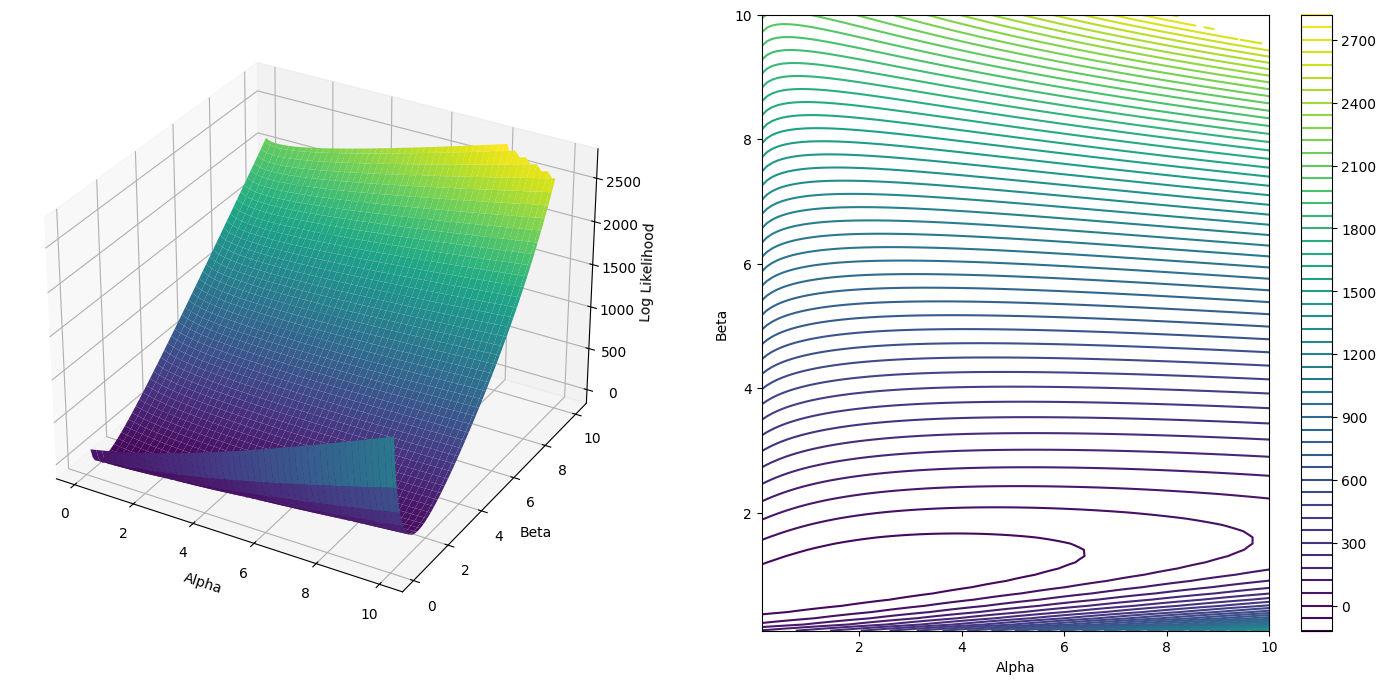

In [107]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 數據加載
data = np.loadtxt('uv.txt', skiprows=1)

U = data[:, 0]
V = data[:, 1]

# 目標函數定義
def log_likelihood(params):
    alpha, beta = params
    f_t = alpha * beta * V ** (beta - 1) * np.exp(-alpha * V ** beta)
    F_T = 1 - np.exp(-alpha * U ** beta)
    return -np.sum(np.log(f_t / F_T))

# 繪製目標函數的立體圖和等高線圖
alpha_range = np.linspace(0.1, 10, 100)
beta_range = np.linspace(0.1, 10, 100)
Alpha, Beta = np.meshgrid(alpha_range, beta_range)
Z = np.array([log_likelihood([a, b]) for a, b in zip(np.ravel(Alpha), np.ravel(Beta))])
Z = Z.reshape(Alpha.shape)

# 立體圖
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(Alpha, Beta, Z, cmap='viridis')
ax.set_xlabel('Alpha')
ax.set_ylabel('Beta')
ax.set_zlabel('Log Likelihood')

# 等高線圖
ax2 = fig.add_subplot(122)
contour = ax2.contour(Alpha, Beta, Z, 50, cmap='viridis')
ax2.set_xlabel('Alpha')
ax2.set_ylabel('Beta')
plt.colorbar(contour, ax=ax2)

plt.show()
